# Assignment 1 ML

### By Aryan Gupta(EE)

## Problem 1

### Task 1

https://www.kaggle.com/guptaaryan16/problem-1-task-1

### Task 2

https://www.kaggle.com/guptaaryan16/polynomial-reg-task2

## Problem 2

### Task 1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [63]:
train_data = pd.read_csv("pendigits_tra.csv", names=["x1","y1","x2","y2","x3","y3","x4","y4","x5","y5","x6","y6","x7","y7","x8","y8", "digit"])
# I have taken column names as they have been defined in the dataset source
train_data.head(10)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
5,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6
6,0,100,3,72,26,35,85,35,100,71,73,97,65,49,66,0,4
7,0,39,2,62,11,5,63,0,100,43,89,99,36,100,0,57,0
8,13,89,12,50,72,38,56,0,4,17,0,61,32,94,100,100,5
9,57,100,22,72,0,31,25,0,75,13,100,50,75,87,26,85,0


In [64]:
train_data.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,37.384307,84.679343,40.005604,82.889512,50.878303,65.044436,51.471844,44.599680,57.129971,34.069122,61.417401,35.782092,54.699760,35.800774,46.813718,28.565386,4.430878
std,33.322024,16.848420,26.256025,19.638582,34.927201,27.377341,30.680075,30.659478,33.680340,27.459989,37.130762,27.495836,22.599781,33.223611,41.531794,35.811094,2.876981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000,2.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000,4.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


In [65]:
tr = train_data
tr["digit"][0]

8

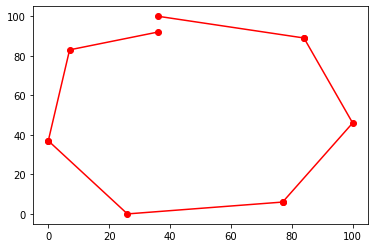

In [66]:
# so first using the plt library I am going to plot the following numbers:
# so I am going to create a plot function to plot them easily without doing much effort
# this is the first draw of the digit using plt
def first_draw_digit(req_digit, id = 0):
    required_data = train_data.loc[train_data["digit"] == req_digit]
    x= []
    y = []
    plot_row = required_data.iloc[id]
    x_values = [plot_row.x1, plot_row.x2, plot_row.x3, plot_row.x4, plot_row.x5, plot_row.x6, plot_row.x7, plot_row.x8]
    y_values = [plot_row.y1, plot_row.y2, plot_row.y3, plot_row.y4,plot_row.y5, plot_row.y6, plot_row.y7, plot_row.y8]
    for a in x_values:
        x.append(a)
    for b in y_values:
        y.append(b)
    for i in range(0, len(x), 2):
        plt.plot(x[i:i+3], y[i:i+3], 'ro-')
        plt.title = f"This is a sample plot of {req_digit}"

first_draw_digit(0,id = 2) # sample plot of O value present in train dataset

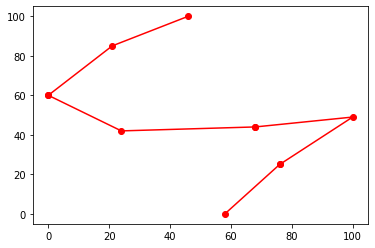

In [67]:
 # sample plot of 4 value present in train dataset
first_draw_digit(4,id =8)

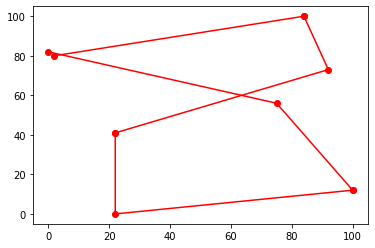

In [68]:
 # sample plot of 8 value present in train dataset
first_draw_digit(8,id =8)

### Task 2

In [69]:
# I need to split the dataset so that I can feed it in logistic regression model
x_train_ds = train_data.drop(["digit"] , axis=1)
y_train_ds = train_data["digit"]

In [70]:
test_data = pd.read_csv("pendigits_tes.csv",  names=["x1","y1","x2","y2","x3","y3","x4","y4","x5","y5","x6","y6","x7","y7","x8","y8", "digit"])
test_data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [71]:
sele = test_data[0:4]
sele

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,digit
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9


In [72]:
x_test_ds = test_data.drop(["digit"] , axis=1)
y_test_ds = test_data["digit"]

In [73]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [74]:
logisticRegr.fit(x_train_ds, y_train_ds)

LogisticRegression()

In [75]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test_ds, y_test_ds)
print(score)

0.9048027444253859


### Task 3

In [14]:
#  Now this is a sample application of KNN using SKlearn so that We can get an idea of the accuracy of this model

In [15]:
class KNN:
    def __init__(self, k, dataset= None):
        self.k = k
        self.x_train = dataset
        self.y_train = dataset

    def load(self, train_dataset):
        import pandas as pd
        df = pd.read_csv(train_dataset)
        col = df.columns
        columns = [x for x in range(col-1)]
        columns.append("digit")
        dataset = pd.read_csv(train_dataset, index_col=columns)
        self.x_train = dataset
        self.x_train = self.x_train.drop("digit")
        self.y_train = dataset["digit"]

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def distance(self, p1, p2)->float:
        # p1 and p2 are going to be arrays containing features of the data-points
        distance = 0
        for i in range(len(p1[0])):
            distance += (p1[i][i]**2)-(p2[i][i]**2)
        distance = distance**0.5
        return distance
    def predict(self, test_data):
        import scipy.stats
        self.x_train = self.x_train
        test_data = test_data
        y_predct = []
        for x_test_point in test_data:
            distances = np.linalg.norm((self.x_train - x_test_point), axis=1)
            final_predct = np.argsort(distances)[:k]
            y_values = []
            y_new = []
            for i in final_predct:
                y_new.append(y_train[i])
            y_values.append(y_new)
            mode_info = scipy.stats.mode(y_values)
            y_predct.append(mode_info[0][0][0])
        return y_predct


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_train_ds, y_train_ds, test_size=0.25, random_state=40)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_test_ds = test_data.drop(["digit"] , axis=1).to_numpy()
y_test_ds = test_data["digit"].to_numpy()

In [17]:
from sklearn import metrics
#Train Model and Predict
k = 5
neigh = KNN(k)
neigh.fit(X_train,y_train)

In [25]:
# Accuracy predicted using the data split from train data
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is", metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.9951974386339381


In [18]:
# accuracy predicted from the data split on test data
Pred_y = neigh.predict(x_test_ds)
print("Accuracy of model at K=4 is", metrics.accuracy_score(y_test_ds, Pred_y))

Accuracy of model at K=4 is 0.9745568896512292


### Task 4

MY model was not showing much change in the accuracy for a good number of iterations so I implemented a standard KNN Classifier using Sklearn to find the difference when multiple values of k are used. 

Here I found that for k = 5 the accuracy of the model was maximum.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_train_ds, y_train_ds, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.9926617745163442


Text(0, 0.5, 'Accuracy')

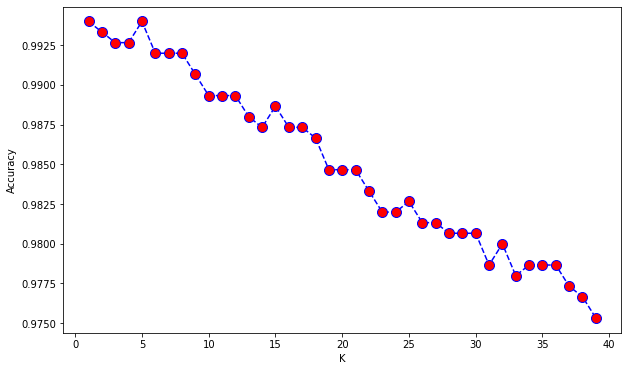

In [81]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Accuracy')

### Task 5

#### Question: 
Good job until now! But, to decide the hyperparameters using the test accuracy is not the best way. Why?


#### Solution: 
The hyperparameters cannot be decided through test accuracy because:
- The test accuracy for a series of parameters is often difficult to compute, especially if the dataset is quite big.
- If we take only accuracy as the parameter, we might overfit on the train data and can't give an accurate prediction on the new test examples.